# Ti-CNN 데이터셋 EDA
- 참조: https://www.kaggle.com/wil2210/eda-nlp-ml

- 11/27 data_preprocessed_1031.tsv 파일에 대해서 재실험 진행

# 환경세팅

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
!ls 'drive/Shared drives/2019_URP_2/data/'

 all_data_0922.csv	      farm_data
 all_data_1031.csv	      re_cooc
 all_data_mini.csv	      saved_models
 all_data_modified.csv	      save_models
 cooc			      test_tensor_data.pt
 cooc_mini		      test.tsv
 cooc.zip		      tfidf
 data_0922_preprocessed.tsv   toxic-comments
 data_1031_preprocessed.tsv   train.tsv
 data_mini_preprocessed.csv   utils.py
 data_mini_preprocessed.tsv   Wikidata-embeddings
 EAN_data		      Wikidata-entity_dict
 experiment_result.gdoc      'Wikidata-knowledge graphs'
 FARM


In [5]:
%cd 'drive/Shared drives/2019_URP_2/'

/content/drive/Shared drives/2019_URP_2


# 데이터셋 연동

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set
%matplotlib inline

In [7]:
!ls data

 all_data_0922.csv	      farm_data
 all_data_1031.csv	      re_cooc
 all_data_mini.csv	      saved_models
 all_data_modified.csv	      save_models
 cooc			      test_tensor_data.pt
 cooc_mini		      test.tsv
 cooc.zip		      tfidf
 data_0922_preprocessed.tsv   toxic-comments
 data_1031_preprocessed.tsv   train.tsv
 data_mini_preprocessed.csv   utils.py
 data_mini_preprocessed.tsv   Wikidata-embeddings
 EAN_data		      Wikidata-entity_dict
 experiment_result.gdoc      'Wikidata-knowledge graphs'
 FARM


URP2/data/data_1031_preprocessed.tsv 데이터가 최종적으로 전처리된 실험에서 사용할 데이터 (11/27 수정-한석)

In [8]:
# label =0 (real) / label=1 (fake)
df = pd.read_csv('data/data_1031_preprocessed.tsv',sep='\t')
print("len:",len(df))
print(df.columns)
df.head()

len: 18291
Index(['text', 'label'], dtype='object')


,text,label
0,"The F.B.I. warning seal, updated for 2016. Pat...",0
1,"MYRTLE BEACH, S.C. Ted Cruz has a simple messa...",0
2,A wall of a thousand miles begins with one bri...,0
3,A group of senators is calling for higher wage...,0
4,"NEW YORK, N.Y. If Hillary Clinton is winning ...",0


In [9]:
df.label.value_counts()

1    10516
0     7775
Name: label, dtype: int64

In [10]:
real = df.loc[df.loc[:,'label']==0,:]
fake = df.loc[df.loc[:,'label']==1,:]
print(len(real),len(fake))

7775 10516


# Model apply

We'll try to combine two models :

1) First, we will process over our raw document as intermediate predictions.

2) Secondly, we will add our predictions as a new feature in our dataframe features and try ML models over them.

## data setting

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [0]:
X_train,X_test, y_train,y_test = train_test_split(df['text'],df['label'],test_size=0.2,random_state=42,stratify=df['label'])

In [13]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((14632,), (3659,), (14632,), (3659,))

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, TfidfTransformer
from sklearn.decomposition import TruncatedSVD

In [0]:
tvec = TfidfVectorizer(stop_words='english')
cvec = CountVectorizer(stop_words='english')
transformer = TfidfTransformer(smooth_idf=False)
svd = TruncatedSVD(n_components=100, random_state=42)

In [16]:
tf = tvec.fit_transform(X_train)
tf

<14632x130561 sparse matrix of type '<class 'numpy.float64'>'
	with 3851891 stored elements in Compressed Sparse Row format>

In [17]:
cv = cvec.fit_transform(X_train)
cv

<14632x130561 sparse matrix of type '<class 'numpy.int64'>'
	with 3851891 stored elements in Compressed Sparse Row format>

## Preprocessing pipeline

In [0]:
from sklearn.pipeline import Pipeline

In [0]:
preprocessing_pipeline = Pipeline( [('tvec', tvec), ('svd', svd)])

In [31]:
preprocessing_pipeline

Pipeline(memory=None,
         steps=[('tvec',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words='english', strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('svd',
                 TruncatedSVD(algorithm='randomized', n_components=100,
                              n_iter=5, random_state=42, tol=0.0))],
  

In [27]:
print(preprocessing_pipeline.fit_transform(X_train).shape)
preprocessing_pipeline.fit_transform(X_train)

(14632, 100)


array([[ 0.21959801, -0.10648936, -0.05740094, ...,  0.00352955,
        -0.01235936, -0.01359894],
       [ 0.13541506, -0.0437668 ,  0.0813913 , ..., -0.00303203,
        -0.01524453,  0.03365265],
       [ 0.24384703, -0.0308689 , -0.03890444, ...,  0.01039018,
         0.00055953, -0.01531939],
       ...,
       [ 0.21312299, -0.0964052 , -0.10040801, ...,  0.01417563,
         0.00246783, -0.00753829],
       [ 0.38737838,  0.01308003,  0.18049705, ..., -0.03920439,
         0.01139943, -0.00690685],
       [ 0.35270401,  0.11091174,  0.15410446, ...,  0.00575194,
         0.00785072,  0.00525374]])

# Machine Learning Models

In [0]:
from sklearn.metrics import confusion_matrix, classification_report

In [0]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [0]:
pipe_mnb = Pipeline([('vectorizer', cvec), ('mnb', mnb)])
pipe_rf = Pipeline([('vectorizer', cvec), ('mnb', rf)])
pipe_lr = Pipeline([('vectorizer', cvec), ('mnb', lr)])
preprocessing_pipeline = Pipeline( [('tvec', tvec), ('svd', svd)])

In [106]:
scores_mnb = cross_val_score(mnb,cvec.fit_transform(X_train),y_train,cv=5)
print('cross-val-score\n{}'.format(scores_mnb))
print('cross-val-score-mean\n{}'.format(scores_mnb.mean()))

cross-val-score
[0.88349846 0.87495729 0.88038278 0.87183869 0.88140807]
cross-val-score-mean
0.8784170570227788


In [107]:
scores_rf = cross_val_score(rf,cvec.fit_transform(X_train),y_train,cv=5)
print('cross-val-score\n{}'.format(scores_rf))
print('cross-val-score-mean\n{}'.format(scores_rf.mean()))

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The de

cross-val-score
[0.86060813 0.86641613 0.84518113 0.85782638 0.86295284]
cross-val-score-mean
0.8585969224704773


In [108]:
scores_lr = cross_val_score(lr,cvec.fit_transform(X_train),y_train,cv=5)
print('cross-val-score\n{}'.format(scores_lr))
print('cross-val-score-mean\n{}'.format(scores_lr.mean()))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


cross-val-score
[0.93884523 0.94055347 0.93711552 0.93643199 0.94190021]
cross-val-score-mean
0.9389692823853902


## cv 점수가 가장 높은 Logistic Regression 선택

모델에 들어갈 X 데이터가 음수 형태면 안됨! => tfidf + SVD 조합은 음수가 나오기에 전처리로 사용하려면 추가 과정 필요

In [109]:
pipe_lr.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Pipeline(memory=None,
         steps=[('vectorizer',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words='english', strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('mnb',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='warn', n_jobs=None,
               

In [110]:
y_pred_lr = pipe_lr.predict(X_test)
y_pred_lr

array([1, 0, 1, ..., 1, 0, 0])

In [111]:
cm = confusion_matrix(y_test, y_pred_lr)
cm

array([[1440,  115],
       [  73, 2031]])

In [112]:
cr = classification_report(y_test, y_pred_lr)
print(cr)

              precision    recall  f1-score   support

           0       0.95      0.93      0.94      1555
           1       0.95      0.97      0.96      2104

    accuracy                           0.95      3659
   macro avg       0.95      0.95      0.95      3659
weighted avg       0.95      0.95      0.95      3659



In [113]:
real_real=X_test.loc[(y_test==0)&(y_pred_lr ==0)]
real_fake=X_test.loc[(y_test==0)&(y_pred_lr ==1)]
fake_fake=X_test.loc[(y_test==1)&(y_pred_lr ==1)]
fake_real=X_test.loc[(y_test==1)&(y_pred_lr ==0)]

print(len(real_real),len(real_fake),len(fake_fake),len(fake_real))

1440 115 2031 73


In [142]:
fake_fake

11059    Rusia mejora el clima para hacer negocios, seg...
11149    Trump Hotels See a YUGE SURGE in Bookings Afte...
14494    UN special rapporteur on Palestine blasts Isra...
18177    Email Every four years, Americans are treated ...
8505     Chart Of The Day: The Great Prosperity (1947-7...
                               ...                        
10950    Ethnic Cleansing? California Town Now Less Tha...
11178    Wikileaks showed that a company linked to Geor...
8488     The views expressed herein are the views of th...
15944    A sobering new Security Council ( SC ) analyti...
15465    Waking Times Black Friday is here, November 25...
Name: text, Length: 2031, dtype: object

# EDA

## making features

In [115]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [0]:
corpus_rr = [word_tokenize(token) for token in real_real]
corpus_rf = [word_tokenize(token) for token in real_fake]
corpus_ff = [word_tokenize(token) for token in fake_fake]
corpus_fr = [word_tokenize(token) for token in fake_real]

In [123]:
len(corpus_rr),len(corpus_rf),len(corpus_ff),len(corpus_fr)

(1440, 115, 2031, 73)

In [0]:
lowercase_rr = [[token.lower() for token in doc] for doc in corpus_rr]
lowercase_rf = [[token.lower() for token in doc] for doc in corpus_rf]
lowercase_ff = [[token.lower() for token in doc] for doc in corpus_ff]
lowercase_fr = [[token.lower() for token in doc] for doc in corpus_fr]

In [0]:
alphas_rr = [[token for token in doc if token.isalpha()] for doc in lowercase_rr]
alphas_rf = [[token for token in doc if token.isalpha()] for doc in lowercase_rf]
alphas_ff = [[token for token in doc if token.isalpha()] for doc in lowercase_ff]
alphas_fr = [[token for token in doc if token.isalpha()] for doc in lowercase_fr]

In [0]:
stop_words = stopwords.words('english')

In [0]:
rr_no_stop = [[token for token in doc if token not in stop_words] for doc in alphas_rr]
rf_no_stop = [[token for token in doc if token not in stop_words] for doc in alphas_rf]
ff_no_stop = [[token for token in doc if token not in stop_words] for doc in alphas_ff]
fr_no_stop = [[token for token in doc if token not in stop_words] for doc in alphas_fr]

In [0]:
stemmer = PorterStemmer()

In [0]:
stemmed_rr = [[stemmer.stem(token) for token in doc] for doc in rr_no_stop]
stemmed_rf = [[stemmer.stem(token) for token in doc] for doc in rf_no_stop]
stemmed_ff = [[stemmer.stem(token) for token in doc] for doc in ff_no_stop]
stemmed_fr = [[stemmer.stem(token) for token in doc] for doc in fr_no_stop]

In [0]:
rr_clean_str = [ ' '.join(doc) for doc in stemmed_rr]
rf_clean_str = [ ' '.join(doc) for doc in stemmed_rf]
ff_clean_str = [ ' '.join(doc) for doc in stemmed_ff]
fr_clean_str = [ ' '.join(doc) for doc in stemmed_fr]

## Features

In [0]:
# number of words
nb_words_rr =[len(tokens) for tokens in alphas_rr]
nb_words_rf =[len(tokens) for tokens in alphas_rf]
nb_words_ff =[len(tokens) for tokens in alphas_ff]
nb_words_fr =[len(tokens) for tokens in alphas_fr]

In [0]:
# number of unique words
alphas_unique_rr = [set(doc) for doc in alphas_rr]
alphas_unique_rf = [set(doc) for doc in alphas_rf]
alphas_unique_ff = [set(doc) for doc in alphas_ff]
alphas_unique_fr = [set(doc) for doc in alphas_fr]

In [0]:
nb_words_unique_rr = [len(doc)/nb_words_rr[i] for i,doc in enumerate(alphas_unique_rr)]
nb_words_unique_rf = [len(doc)/nb_words_rf[i] for i,doc in enumerate(alphas_unique_rf)]
nb_words_unique_ff = [len(doc)/nb_words_ff[i] if nb_words_ff[i]!=0 else 0 for i,doc in enumerate(alphas_unique_ff) ]
nb_words_unique_fr = [len(doc)/nb_words_fr[i] for i,doc in enumerate(alphas_unique_fr)]

In [0]:
# number of characters
rr_str = [ ' '.join(doc) for doc in lowercase_rr]
rf_str = [ ' '.join(doc) for doc in lowercase_rf]
ff_str = [ ' '.join(doc) for doc in lowercase_ff]
fr_str = [ ' '.join(doc) for doc in lowercase_fr]

In [0]:
nb_characters_rr = [len(doc) for doc in rr_str]
nb_characters_rf = [len(doc) for doc in rf_str]
nb_characters_ff = [len(doc) for doc in ff_str]
nb_characters_fr = [len(doc) for doc in fr_str]

In [0]:
# number of stopwords
rr_stopwords = [[token for token in doc if token in stop_words] for doc in alphas_rr]
rf_stopwords = [[token for token in doc if token in stop_words] for doc in alphas_rf]
ff_stopwords = [[token for token in doc if token in stop_words] for doc in alphas_ff]
fr_stopwords = [[token for token in doc if token in stop_words] for doc in alphas_fr]

In [0]:
nb_stopwords_rr = [len(doc)/nb_words_rr[i] for i,doc in enumerate(rr_stopwords)]
nb_stopwords_rf = [len(doc)/nb_words_rf[i] for i,doc in enumerate(rf_stopwords)]
nb_stopwords_ff = [len(doc)/nb_words_ff[i] if nb_words_ff[i]!=0 else 0 for i,doc in enumerate(ff_stopwords)]
nb_stopwords_fr = [len(doc)/nb_words_fr[i] for i,doc in enumerate(fr_stopwords)]

In [0]:
# number of punctuations
non_alphas_rr = [[token for token in doc if token.isalpha() == False] for doc in lowercase_rr]
non_alphas_rf = [[token for token in doc if token.isalpha() == False] for doc in lowercase_rf]
non_alphas_ff = [[token for token in doc if token.isalpha() == False] for doc in lowercase_ff]
non_alphas_fr = [[token for token in doc if token.isalpha() == False] for doc in lowercase_fr]

In [0]:
nb_punctuations_rr = [len(doc) for doc in non_alphas_rr]
nb_punctuations_rf = [len(doc) for doc in non_alphas_rf]
nb_punctuations_ff = [len(doc) for doc in non_alphas_ff]
nb_punctuations_fr = [len(doc) for doc in non_alphas_fr]

In [0]:
# number of title case words
rr_title = [[token for token in doc if token.istitle() == True] for doc in corpus_rr]
rf_title = [[token for token in doc if token.istitle() == True] for doc in corpus_rf]
ff_title = [[token for token in doc if token.istitle() == True] for doc in corpus_ff]
fr_title = [[token for token in doc if token.istitle() == True] for doc in corpus_fr]

In [0]:
nb_title_rr = [len(doc)/nb_words_rr[i] for i,doc in enumerate(rr_title)]
nb_title_rf = [len(doc)/nb_words_rf[i] for i,doc in enumerate(rf_title)]
nb_title_ff = [len(doc)/nb_words_ff[i] if nb_words_ff[i]!=0 else 0 for i,doc in enumerate(ff_title)]
nb_title_fr = [len(doc)/nb_words_fr[i] for i,doc in enumerate(fr_title)]

fake_fake 중에서 쓰레기 값이 있어서 nb_words가 아예 없는 경우도 있음

In [444]:
print(nb_words_ff[nb_words_ff==0],'\n')
fake_fake.iloc[915,]

146    0
275    0
450    0
643    0
915    0
dtype: int64 



'0  0  23      ,         ,    .   ,       .        " " (  ). "        .    .     .                     . ,    ,       ,         ", -     ,    Pravda.Ru. "           .            ,       ,       .   -     ", -  . "      -      ,        ", -  . "    -          .      ,       .     -     .   ,          , ,       .   -   ,  ,      ,     ", -   . :'

In [0]:
df_clean_rr = pd.DataFrame(data = {'text_clean': rr_clean_str})
df_clean_rf = pd.DataFrame(data = {'text_clean': rf_clean_str})
df_clean_ff = pd.DataFrame(data = {'text_clean': ff_clean_str})
df_clean_fr = pd.DataFrame(data = {'text_clean': fr_clean_str})

In [0]:
nb_words_rr = pd.Series(nb_words_rr)
nb_words_rf = pd.Series(nb_words_rf)
nb_words_ff = pd.Series(nb_words_ff)
nb_words_fr = pd.Series(nb_words_fr)

nb_words_unique_rr = pd.Series(nb_words_unique_rr)
nb_words_unique_rf = pd.Series(nb_words_unique_rf)
nb_words_unique_ff = pd.Series(nb_words_unique_ff)
nb_words_unique_fr = pd.Series(nb_words_unique_fr)

nb_characters_rr = pd.Series(nb_characters_rr)
nb_characters_rf = pd.Series(nb_characters_rf)
nb_characters_ff = pd.Series(nb_characters_ff)
nb_characters_fr = pd.Series(nb_characters_fr)

nb_stopwords_rr = pd.Series(nb_stopwords_rr)
nb_stopwords_rf = pd.Series(nb_stopwords_rf)
nb_stopwords_ff = pd.Series(nb_stopwords_ff)
nb_stopwords_fr = pd.Series(nb_stopwords_fr)

nb_punctuations_rr = pd.Series(nb_punctuations_rr)
nb_punctuations_rf = pd.Series(nb_punctuations_rf)
nb_punctuations_ff = pd.Series(nb_punctuations_ff)
nb_punctuations_fr = pd.Series(nb_punctuations_fr)

nb_title_rr = pd.Series(nb_title_rr)
nb_title_rf = pd.Series(nb_title_rf)
nb_title_ff = pd.Series(nb_title_ff)
nb_title_fr = pd.Series(nb_title_fr)

In [447]:
df_show_rr = pd.concat([df_clean_rr, nb_words_rr, nb_words_unique_rr, nb_characters_rr, nb_stopwords_rr, nb_punctuations_rr, nb_title_rr], axis=1).rename(columns={
    0: "Number of words", 1: 'Number of unique words', 2: 'Number of characters', 3: 'Number of stopwords', 4: 'Number of punctuations',
    5: 'Number of titlecase words'
})
df_show_rr.head()

,text_clean,Number of words,Number of unique words,Number of characters,Number of stopwords,Number of punctuations,Number of titlecase words
0,berlin pope franci call religi commun cathol p...,620,0.488710,4081,0.445161,94,0.153226
1,new york well got awkward began expect rib pre...,779,0.481386,4870,0.468549,178,0.163030
2,boston globe offic darren imag lauren dezenski...,552,0.507246,3736,0.413043,86,0.226449
3,bill want know iran nuclear program deal want ...,156,0.596154,997,0.416667,36,0.243590
4,cuba complet releas polit prison part last mon...,333,0.561562,2269,0.444444,65,0.210210


In [448]:
df_show_rf = pd.concat([df_clean_rf, nb_words_rf, nb_words_unique_rf, nb_characters_rf, nb_stopwords_rf, nb_punctuations_rf, nb_title_rf], axis=1).rename(columns={
    0: "Number of words", 1: 'Number of unique words', 2: 'Number of characters', 3: 'Number of stopwords', 4: 'Number of punctuations',
    5: 'Number of titlecase words'
})
df_show_rf.head()

,text_clean,Number of words,Number of unique words,Number of characters,Number of stopwords,Number of punctuations,Number of titlecase words
0,new decre russian govern would refus driver li...,97,0.731959,688,0.360825,20,0.134021
1,clinton campaign react yet anoth ad featur tru...,906,0.450331,5117,0.498896,85,0.112583
2,duggar deliv stun display deflect longest exer...,706,0.492918,4210,0.484419,104,0.145892
3,julian assang cancel dramat london balconi add...,412,0.606796,2869,0.373786,66,0.194175
4,democrat presidenti nomine hillari clinton pic...,151,0.701987,1037,0.397351,30,0.198675


In [449]:
df_show_ff = pd.concat([df_clean_ff, nb_words_ff, nb_words_unique_ff, nb_characters_ff, nb_stopwords_ff, nb_punctuations_ff, nb_title_ff], axis=1).rename(columns={
    0: "Number of words", 1: 'Number of unique words', 2: 'Number of characters', 3: 'Number of stopwords', 4: 'Number of punctuations',
    5: 'Number of titlecase words'
})
df_show_ff.head()

,text_clean,Number of words,Number of unique words,Number of characters,Number of stopwords,Number of punctuations,Number of titlecase words
0,rusia mejora el clima para hacer negocio segn ...,269,0.490706,1671,0.055762,55,0.185874
1,trump hotel see yuge surg book histor win trum...,276,0.572464,1735,0.373188,49,0.365942
2,un special rapporteur palestin blast isra step...,558,0.564516,3885,0.363799,85,0.197133
3,email everi four year american treat tawdri sp...,3349,0.319200,21682,0.462825,437,0.125411
4,chart day great prosper vs great regress david...,83,0.795181,637,0.325301,23,0.469880


NULL check

In [450]:
print(df_show_ff.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2031 entries, 0 to 2030
Data columns (total 7 columns):
text_clean                   2031 non-null object
Number of words              2031 non-null int64
Number of unique words       2031 non-null float64
Number of characters         2031 non-null int64
Number of stopwords          2031 non-null float64
Number of punctuations       2031 non-null int64
Number of titlecase words    2031 non-null float64
dtypes: float64(3), int64(3), object(1)
memory usage: 111.2+ KB
None


In [451]:
# nb_title_ff[140:170]
fake_fake.iloc[146]

'0  0   Pravda.Ru    ,         2,5-3      .     -  -        ,  .      (), "         .     2,5-3 ".  ,   -        . , ""  778      22:21        .    22:45           ,    -     .         22:45        "".    -  30    . "            ", -   . .  ,      ""             .   -  "",     ,     3          77.     ,           ,      .          ,       .    "",       ,       .        ,   ,     "".    "",         ,    .    200   .     ,   ,  ,    ,         ,        .      ,             .      ,      .        .     .    Pravda.Ru   :'

In [452]:
df_show_fr = pd.concat([df_clean_fr, nb_words_fr, nb_words_unique_fr, nb_characters_fr, nb_stopwords_fr, nb_punctuations_fr, nb_title_fr], axis=1).rename(columns={
    0: "Number of words", 1: 'Number of unique words', 2: 'Number of characters', 3: 'Number of stopwords', 4: 'Number of punctuations',
    5: 'Number of titlecase words'
})
df_show_fr.head()

,text_clean,Number of words,Number of unique words,Number of characters,Number of stopwords,Number of punctuations,Number of titlecase words
0,us impun erod world justic deficit hysteria in...,699,0.580830,4660,0.409156,82,0.198856
1,email hafnarfjorur iceland vote turnout elect ...,1086,0.429098,6973,0.485267,194,0.124309
2,email branch offic pentagon militari allianc b...,1314,0.441400,8347,0.465753,133,0.177321
3,subscrib dear gop presidenti candid donald tru...,874,0.437071,4866,0.525172,81,0.107551
4,print republican nation committe spokesman sea...,139,0.647482,962,0.417266,15,0.194245


## plot each feautures

### 1.Number of words

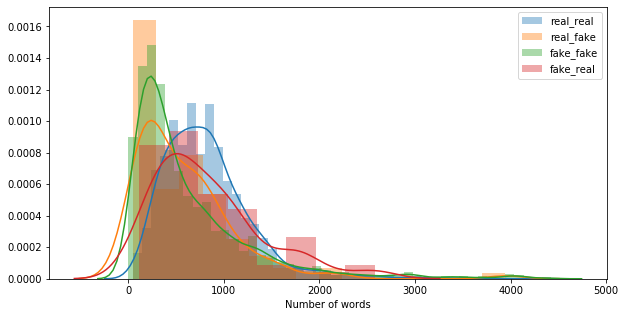

In [453]:
'''['text_clean', 'Number of words', 'Number of unique words',
       'Number of characters', 'Number of stopwords', 'Number of punctuations',
       'Number of titlecase words']
'''
plt.figure(figsize=(10,5))
sns.distplot(df_show_rr['Number of words'],label='real_real')
sns.distplot(df_show_rf['Number of words'],label='real_fake')
sns.distplot(df_show_ff['Number of words'],label='fake_fake')
sns.distplot(df_show_fr['Number of words'],label='fake_real')
plt.legend()

### 2.Number of unique words

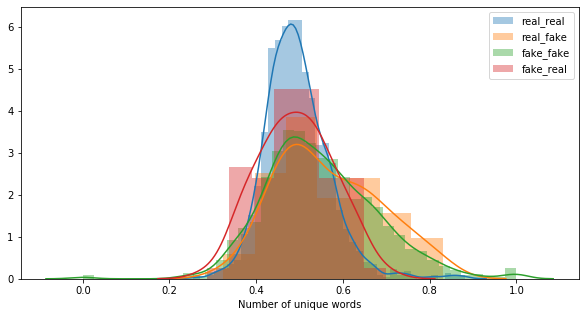

In [454]:
'''['text_clean', 'Number of words', 'Number of unique words',
       'Number of characters', 'Number of stopwords', 'Number of punctuations',
       'Number of titlecase words']
'''
plt.figure(figsize=(10,5))
sns.distplot(df_show_rr['Number of unique words'],label='real_real',)
sns.distplot(df_show_rf['Number of unique words'],label='real_fake')
sns.distplot(df_show_ff['Number of unique words'],label='fake_fake')
sns.distplot(df_show_fr['Number of unique words'],label='fake_real')
plt.legend()

### 4.Number of characters

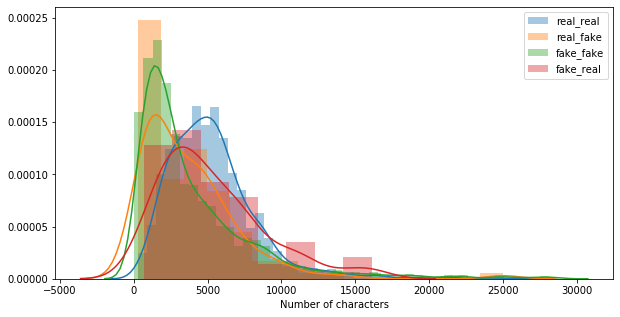

In [455]:
'''['text_clean', 'Number of words', 'Number of unique words',
       'Number of characters', 'Number of stopwords', 'Number of punctuations',
       'Number of titlecase words']
'''

plt.figure(figsize=(10,5))
sns.distplot(df_show_rr['Number of characters'],label='real_real')
sns.distplot(df_show_rf['Number of characters'],label='real_fake')
sns.distplot(df_show_ff['Number of characters'],label='fake_fake')
sns.distplot(df_show_fr['Number of characters'],label='fake_real')
plt.legend()

### 5.Number of stopwords

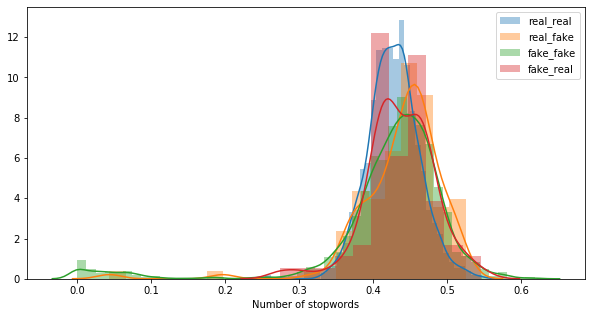

In [456]:
'''['text_clean', 'Number of words', 'Number of unique words',
       'Number of characters', 'Number of stopwords', 'Number of punctuations',
       'Number of titlecase words']
'''
plt.figure(figsize=(10,5))
sns.distplot(df_show_rr['Number of stopwords'],label='real_real')
sns.distplot(df_show_rf['Number of stopwords'],label='real_fake')
sns.distplot(df_show_ff['Number of stopwords'],label='fake_fake')
sns.distplot(df_show_fr['Number of stopwords'],label='fake_real')
plt.legend()

### 6.Number of puctuations

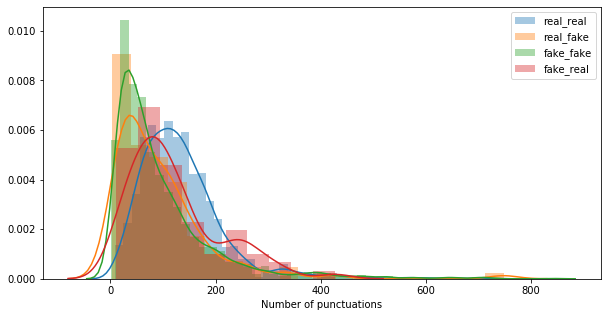

In [457]:
'''['text_clean', 'Number of words', 'Number of unique words',
       'Number of characters', 'Number of stopwords', 'Number of punctuations',
       'Number of titlecase words']
'''

plt.figure(figsize=(10,5))
sns.distplot(df_show_rr['Number of punctuations'],label='real_real')
sns.distplot(df_show_rf['Number of punctuations'],label='real_fake')
sns.distplot(df_show_ff['Number of punctuations'],label='fake_fake')
sns.distplot(df_show_fr['Number of punctuations'],label='fake_real')
plt.legend()

### 7.Number of titlecase words

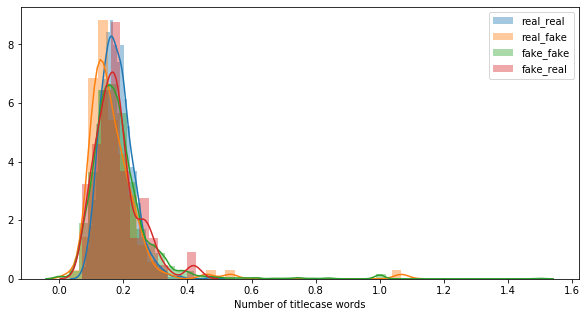

In [459]:
'''['text_clean', 'Number of words', 'Number of unique words',
       'Number of characters', 'Number of stopwords', 'Number of punctuations',
       'Number of titlecase words']
'''

plt.figure(figsize=(10,5))
sns.distplot(df_show_rr['Number of titlecase words'],label='real_real')
sns.distplot(df_show_rf['Number of titlecase words'],label='real_fake')
sns.distplot(df_show_ff['Number of titlecase words'],label='fake_fake')
sns.distplot(df_show_fr['Number of titlecase words'],label='fake_real')
plt.legend()
